In [ ]:
#coba 2 model(alexnet, resnet) dataset cifar-10?
#saya alexnet
#laporan jelasin dinotebook, bedanya apa
#2 notebook
#akurasi diatas 60%
#Audry was here :D

In [ ]:
from collections import Counter
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_flat = y_train.flatten()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = tf.reshape(y_train, [-1])
y_test = tf.reshape(y_test, [-1])
y_train = tf.one_hot(tf.cast(y_train, tf.int32), depth=10)
y_test = tf.one_hot(tf.cast(y_test, tf.int32), depth=10)

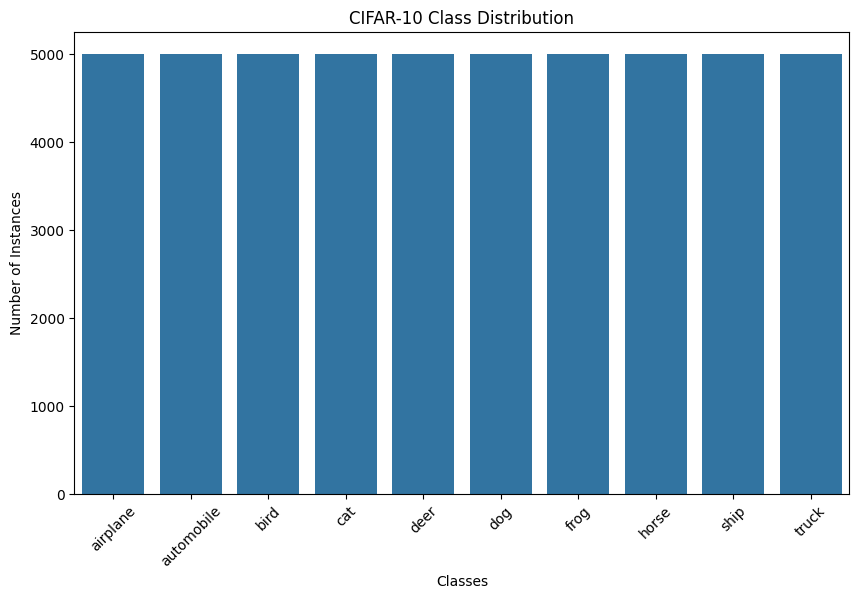

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_flat)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('CIFAR-10 Class Distribution')
plt.show()

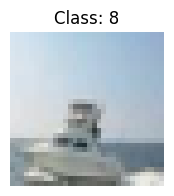

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[100])
plt.title(f"Class: {np.argmax(y_train[100])}")
plt.axis('off')
plt.show()

In [ ]:
print(f"Shape of y_train: {y_train.shape}")
print(f"One-hot encoded label example: {y_train[0]}")

Shape of y_train: (50000, 10)
One-hot encoded label example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def alexnet(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 10
model = alexnet(input_shape, num_classes)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=250,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/250
1563/1563 [==============================] - 53s 32ms/step - loss: 1.8169 - accuracy: 0.3313 - val_loss: 1.4526 - val_accuracy: 0.4831 - lr: 0.0010
Epoch 2/250
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4925 - accuracy: 0.4680 - val_loss: 1.3263 - val_accuracy: 0.5303 - lr: 0.0010
Epoch 3/250
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3051 - accuracy: 0.5460 - val_loss: 1.1464 - val_accuracy: 0.6014 - lr: 0.0010
Epoch 4/250
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1730 - accuracy: 0.5961 - val_loss: 1.0631 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 5/250
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0757 - accuracy: 0.6304 - val_loss: 0.9770 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 6/250
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0015 - accuracy: 0.6609 - val_loss: 1.5930 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 7/250
1563/1563 [=================

In [ ]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(x_test)

# Convert predictions and true labels from one-hot encoding to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

    airplane       0.84      0.87      0.85      1000
  automobile       0.89      0.94      0.91      1000
        bird       0.88      0.70      0.78      1000
         cat       0.75      0.61      0.68      1000
        deer       0.85      0.78      0.81      1000
         dog       0.73      0.80      0.77      1000
        frog       0.80      0.92      0.85      1000
       horse       0.83      0.89      0.86      1000
        ship       0.93      0.88      0.91      1000
       truck       0.83      0.91      0.87      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



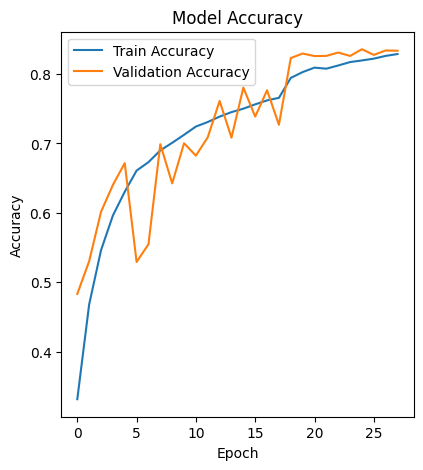

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

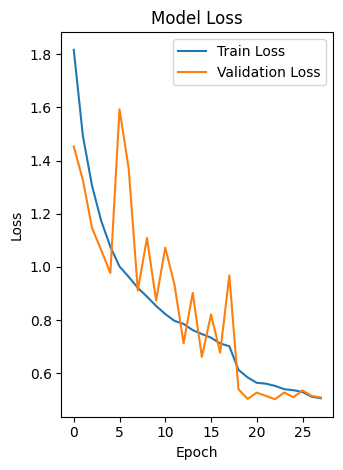

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 8ms/step


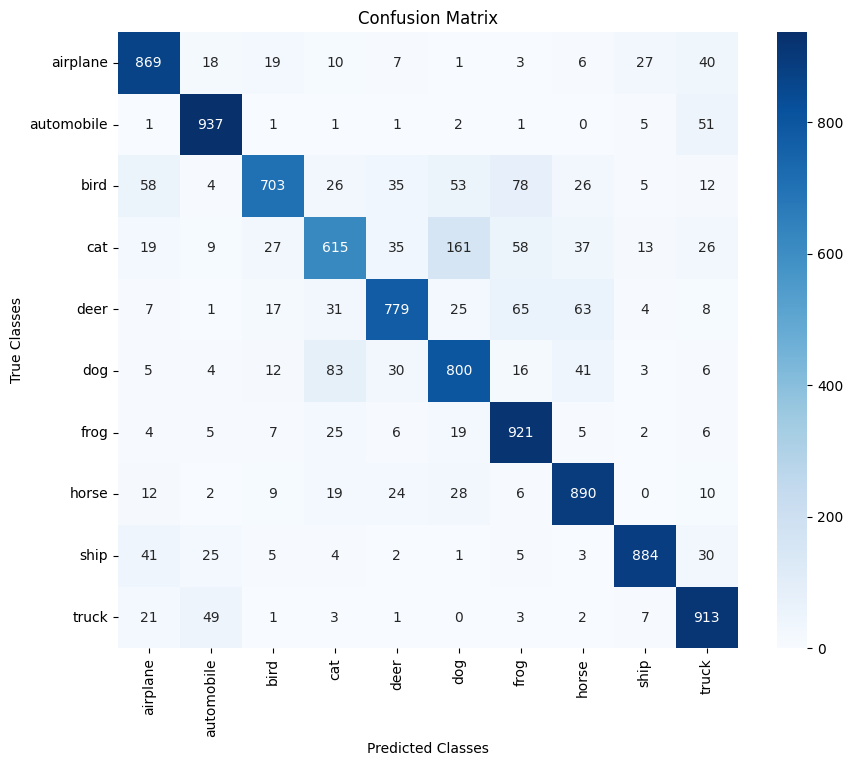

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

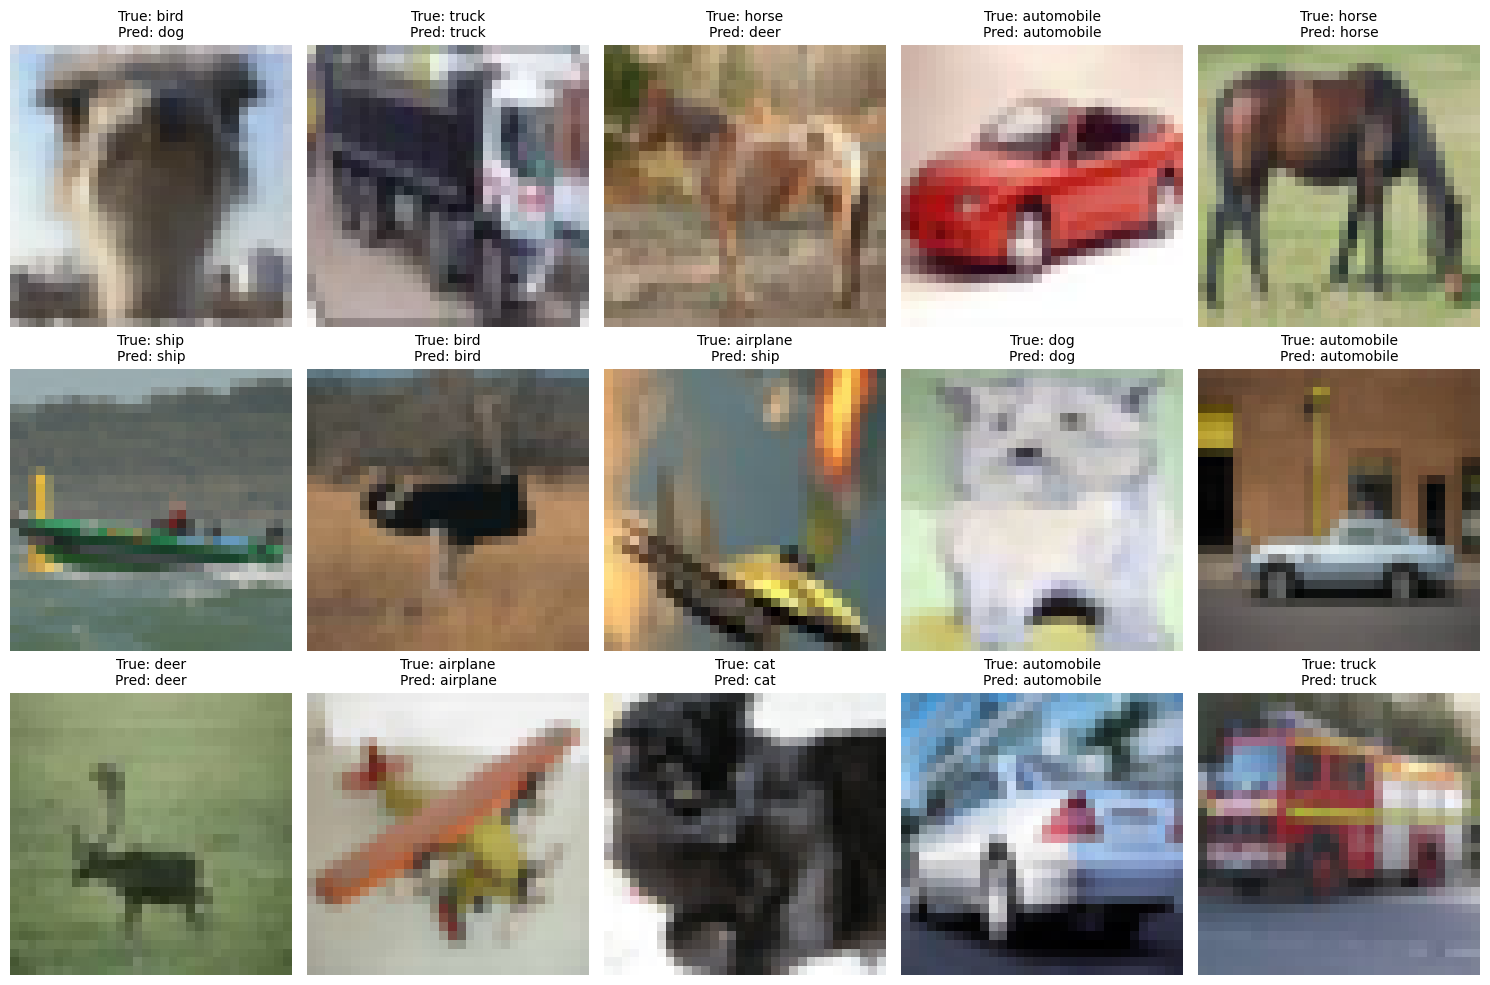

In [ ]:
num_images = 15

indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.axis('off')

    true_label = class_names[y_true_classes[idx]]
    predicted_label = class_names[y_pred_classes[idx]]

    plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=10)

plt.tight_layout()
plt.show()

Saving plane.jpg to plane.jpg
1/1 [==============================] - 0s 27ms/step


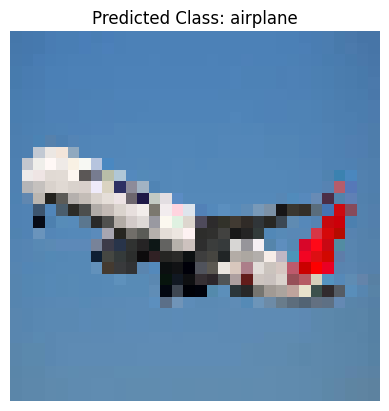

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_class(model, img_path):
    processed_image = load_and_preprocess_image(img_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

uploaded = files.upload()

for fn in uploaded.keys():
    new_image_path = fn

predicted_class_index = predict_image_class(model, new_image_path)

plt.imshow(image.load_img(new_image_path, target_size=(32, 32)))
plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
plt.axis('off')
plt.show()

Saving scoobe.png to scoobe (1).png
1/1 [==============================] - 0s 26ms/step


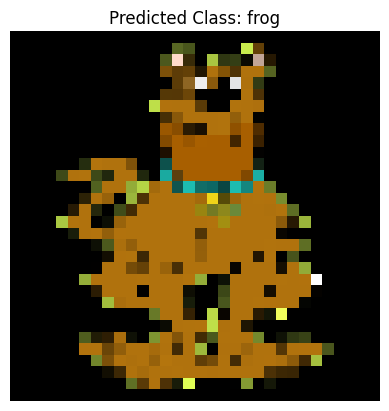

In [ ]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_class(model, img_path):
    processed_image = load_and_preprocess_image(img_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

uploaded = files.upload()

for fn in uploaded.keys():
    new_image_path = fn

predicted_class_index = predict_image_class(model, new_image_path)

plt.imshow(image.load_img(new_image_path, target_size=(32, 32)))
plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
plt.axis('off')
plt.show()

According to the resources online, AlexNet is prone to overfitting, judging from the validation graphs that rarely coincides with the training graph. This is further proved by the model mislabelling a picture of ScoobyDoo as a frog of all things.

However with a better model like VGG16, the pretraining shows more promises. The model sometimes confuses a cat as a dog, which would make sense considering the condensed pixels the model analyze. Automobile and ships as the classes with the best prediction out of all classes.

Also this isnt truly AlexNet or at least a pretrained version of it because I refuse to use Torch as of now
😭. It is however still AlexNet at its essence judging by the layer it uses.